# Main Notebook - The Office

In [1]:
import pandas as pd
import os
import re
from collections import defaultdict
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
path_cast='C:/Users/Lado/Google Drive/SocialGraphs/Untitled Folder/cast_details.csv'

In [3]:
df = pd.read_csv(path_cast)

# Convert 'Episodes_Count' to numeric (in case it's not)
df['Episodes_Count'] = pd.to_numeric(df['Episodes_Count'], errors='coerce')

# Define a function to extract the first name and last name
def split_name(name):
    # Split the name by spaces
    parts = name.split()
    # The first name is the first part
    first_name = parts[0] if parts else ''
    # The last name is the rest of the parts joined, or the second part if there are only two parts
    last_name = ' '.join(parts[1:]) if len(parts) > 2 else parts[1] if len(parts) == 2 else ''
    return first_name, last_name

# Apply the split_name function to the 'Character' column
df['Character_Name'], df['Character_Surname'] = zip(*df['Character'].apply(split_name))

# Display the modified DataFrame
df[['Actor', 'Character_Name', 'Character_Surname', 'Episodes_Count', 'Years']]

# Filter out rows where 'Episodes_Count' is less than 2
df_filtered = df[df['Episodes_Count'] >= 3]
character_names_list = df_filtered['Character_Name'].tolist()

In [4]:
path_txt = "C:/Users/Lado/Google Drive/SocialGraphs/Untitled Folder/episode_transcripts_pt1"

In [5]:
# Function to find connections
def find_connections(path_txt, character_names_list):
    # Dictionary to store names and their connections
    connections = defaultdict(list)
    
    # Compile a regular expression pattern to match any name in the list
    names_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, character_names_list)) + r')\b')

    # Iterate over all text files in the folder
    for filename in os.listdir(path_txt):
        if filename.endswith(".txt"):
            file_path = os.path.join(path_txt, filename)

            # Read the file content
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()

                # For each name in the list, find all occurrences and their connections
                for name in character_names_list:
                    # Find all occurrences of the name followed by a colon
                    pattern = rf"{re.escape(name)}:"
                    for match in re.finditer(pattern, content):
                        # Get the rest of the content after the name
                        following_content = content[match.end():]
                        # Find the next three names that are also in the character_names_list
                        following_names = names_pattern.findall(following_content)
                        # Removing the Speakers name
                        filtered_names = [n for n in following_names if n != name]
                        # Get the next three names, including duplicates
                        connections[name].extend(filtered_names[:3])

    return connections

connections_dict = find_connections(path_txt, character_names_list)
# Print the resulting dictionary
for name, conns in connections_dict.items():
    print(f"{name}: {conns}")

Dwight: ['Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Oscar', 'Michael', 'Michael', 'Jim', 'Jim', 'Pam', 'Jim', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Gabe', 'The', 'Gabe', 'The', 'Gabe', 'The', 'Gabe', 'Gabe', 'Gabe', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Michael', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Michael', 'Kelly', 'Michael', 'Michael', 'Michael', 'Michael', 'Donna', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Michael', 'Kelly', 'Michael', 'Donna', 'Kelly', 'Ryan', 'Kelly', 'Kelly', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Kelly', 'Kelly', 'Ryan', 'Ryan', 'Kelly', 'Darryl', 'Mose', 'Kelly', 'Gabe', 'Gabe', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Kelly', 'Gabe', 'Kelly', 'Kelly', 'Gabe', 'Kelly', 'Erin', 'Erin', 'Stanley', 'Erin', 'Stanley', 'Stanley', 'Stanley', 'Stanley', 'Erin', 'Stanley', 'Erin', 'Oscar', 'Oscar', 'Oscar', 'Kelly', 'Kelly', 'Eri

In [6]:
def count_connections(connections_dict):
    # New dictionary to store counts
    connections_count_dict = {}

    for name, connections in connections_dict.items():
        # Count the occurrences of each connection
        connection_counts = Counter(connections)
        # Sort the connections by count in descending order
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        # Format the count as 'name count'
        formatted_counts = [f"{conn} {count}" for conn, count in sorted_counts]
        # Assign to the new dictionary
        connections_count_dict[name] = formatted_counts

    return connections_count_dict

# Count the connections
connections_count_dict = count_connections(connections_dict)

# Print the resulting dictionary in descending order of counts
for name, conns in connections_count_dict.items():
    print(f"{name}: {conns}")

Dwight: ['Jim 1913', 'Andy 708', 'Pam 697', 'Angela 581', 'Michael 441', 'Erin 420', 'Nellie 318', 'Clark 317', 'The 307', 'Darryl 293', 'Oscar 291', 'Kevin 281', 'Stanley 191', 'Phyllis 168', 'Gabe 137', 'Robert 134', 'Ryan 132', 'Kelly 126', 'Toby 109', 'David 105', 'Mose 95', 'Meredith 85', 'Jo 77', 'Nate 70', 'Esther 69', 'Cathy 58', 'Creed 53', 'Deangelo 47', 'Donna 46', 'Holly 45', 'Jan 43', 'Todd 39', 'Pete 31', 'Zeke 30', 'Val 26', 'Rolf 26', 'Troy 25', 'Billy 16', 'Jordan 11', 'Hank 8', 'Nick 7', 'Jessica 7', 'Athlead 5', 'Brian 4', 'Justin 3', 'Asian 2', 'Stephanie 2', 'Jada 2', 'Helene 1', 'Flower 1', 'Dan 1', 'Madge 1', 'Carol 1', 'Sasha 1', 'Jake 1', 'Ravi 1', 'Tom 1', 'Hunter 1', 'Charles 1', 'Josh 1']
Jim: ['Dwight 1800', 'Pam 1606', 'Andy 566', 'Michael 386', 'Darryl 360', 'Robert 192', 'Kevin 190', 'The 187', 'Erin 174', 'Oscar 162', 'Stanley 153', 'Phyllis 152', 'Nellie 148', 'Angela 136', 'Ryan 130', 'Toby 88', 'Gabe 86', 'Kelly 79', 'Meredith 78', 'Clark 70', 'Cathy

In [7]:
def count_connections(connections_dict):
    # New dictionary to store counts
    connections_count_dict = {}

    for name, connections in connections_dict.items():
        # Count the occurrences of each connection
        connection_counts = Counter(connections)
        # Sort the connections by count in descending order
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        # Format the count as 'name count'
        formatted_counts = [f"{conn}" for conn, count in sorted_counts]
        # Assign to the new dictionary
        connections_count_dict[name] = formatted_counts

    return connections_count_dict

# Count the connections
connections_count_dict = count_connections(connections_dict)

# Print the resulting dictionary in descending order of counts
for name, conns in connections_count_dict.items():
    print(f"{name}: {conns}")

Dwight: ['Jim', 'Andy', 'Pam', 'Angela', 'Michael', 'Erin', 'Nellie', 'Clark', 'The', 'Darryl', 'Oscar', 'Kevin', 'Stanley', 'Phyllis', 'Gabe', 'Robert', 'Ryan', 'Kelly', 'Toby', 'David', 'Mose', 'Meredith', 'Jo', 'Nate', 'Esther', 'Cathy', 'Creed', 'Deangelo', 'Donna', 'Holly', 'Jan', 'Todd', 'Pete', 'Zeke', 'Val', 'Rolf', 'Troy', 'Billy', 'Jordan', 'Hank', 'Nick', 'Jessica', 'Athlead', 'Brian', 'Justin', 'Asian', 'Stephanie', 'Jada', 'Helene', 'Flower', 'Dan', 'Madge', 'Carol', 'Sasha', 'Jake', 'Ravi', 'Tom', 'Hunter', 'Charles', 'Josh']
Jim: ['Dwight', 'Pam', 'Andy', 'Michael', 'Darryl', 'Robert', 'Kevin', 'The', 'Erin', 'Oscar', 'Stanley', 'Phyllis', 'Nellie', 'Angela', 'Ryan', 'Toby', 'Gabe', 'Kelly', 'Meredith', 'Clark', 'Cathy', 'Deangelo', 'Pete', 'Jo', 'Creed', 'Holly', 'David', 'Tom', 'Mose', 'Roy', 'Todd', 'Brian', 'Donna', 'Athlead', 'Jordan', 'Hank', 'Val', 'Jessica', 'Kenny', 'Nate', 'Zeke', 'Irene', 'Esther', 'Nick', 'Blue', 'Ravi', 'Rolf', 'Carol', 'Billy', 'Dan', 'Madg

In [8]:
################################################################################################################################

In [9]:
##########################################################################################################################

## Replicated - but with loading all three folders + network 

In [10]:
base_path = "C:/Users/Lado/Google Drive/SocialGraphs/Untitled Folder/"

In [11]:
# Function to find connections
def find_connections(folders, character_names_list):
    # Dictionary to store names and their connections
    connections = defaultdict(list)
    
    # Compile a regular expression pattern to match any name in the list
    names_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, character_names_list)) + r')\b')

    # Iterate over all specified folders
    for folder_path in folders:
        # Check if the folder exists
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue

        # Iterate over all text files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(folder_path, filename)

                # Read the file content
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()

                    # For each name in the list, find all occurrences and their connections
                    for name in character_names_list:
                        # Find all occurrences of the name followed by a colon
                        pattern = rf"{re.escape(name)}:"
                        for match in re.finditer(pattern, content):
                            # Get the rest of the content after the name
                            following_content = content[match.end():]
                            # Find the next three names that are also in the character_names_list
                            following_names = names_pattern.findall(following_content)
                            # Removing the speaker's name
                            filtered_names = [n for n in following_names if n != name]
                            # Get the next three names, including duplicates
                            connections[name].extend(filtered_names[:3])

    return connections

folder_paths = [os.path.join(base_path, f"episode_transcripts_pt{i}") for i in range(1, 4)]
connections_dict = find_connections(folder_paths, character_names_list)

# Print the resulting dictionary
for name, conns in connections_dict.items():
    print(f"{name}: {conns}")

Dwight: ['Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Oscar', 'Michael', 'Michael', 'Jim', 'Jim', 'Pam', 'Jim', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Gabe', 'The', 'Gabe', 'The', 'Gabe', 'The', 'Gabe', 'Gabe', 'Gabe', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Michael', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Michael', 'Kelly', 'Michael', 'Michael', 'Michael', 'Michael', 'Donna', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Kelly', 'Michael', 'Kelly', 'Michael', 'Donna', 'Kelly', 'Ryan', 'Kelly', 'Kelly', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Kelly', 'Kelly', 'Ryan', 'Ryan', 'Kelly', 'Darryl', 'Mose', 'Kelly', 'Gabe', 'Gabe', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Gabe', 'Darryl', 'Kelly', 'Gabe', 'Kelly', 'Kelly', 'Gabe', 'Kelly', 'Erin', 'Erin', 'Stanley', 'Erin', 'Stanley', 'Stanley', 'Stanley', 'Stanley', 'Erin', 'Stanley', 'Erin', 'Oscar', 'Oscar', 'Oscar', 'Kelly', 'Kelly', 'Eri

In [12]:
def count_connections(connections_dict):
    # New dictionary to store counts
    connections_count_dict = {}

    for name, connections in connections_dict.items():
        # Count the occurrences of each connection
        connection_counts = Counter(connections)
        # Sort the connections by count in descending order
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        # Format the count as 'name count'
        formatted_counts = [f"{conn}" for conn, count in sorted_counts]
        # Assign to the new dictionary
        connections_count_dict[name] = formatted_counts

    return connections_count_dict

# Count the connections
connections_count_dict = count_connections(connections_dict)

# Print the resulting dictionary in descending order of counts
for name, conns in connections_count_dict.items():
    print(f"{name}: {conns}")

Dwight: ['Michael', 'Jim', 'Pam', 'Andy', 'Angela', 'The', 'Ryan', 'Erin', 'Oscar', 'Kevin', 'Phyllis', 'Darryl', 'Stanley', 'Kelly', 'Nellie', 'Toby', 'Clark', 'Jan', 'Meredith', 'David', 'Gabe', 'Mose', 'Robert', 'Creed', 'Holly', 'Jo', 'Karen', 'Charles', 'Nate', 'Esther', 'Cathy', 'Isabel', 'Deangelo', 'Donna', 'Todd', 'Roy', 'Pete', 'Katy', 'Zeke', 'Troy', 'Val', 'Carol', 'Rolf', 'Billy', 'Hank', 'Josh', 'Jake', 'Nick', 'Bob', 'Tall', 'Jordan', 'Tom', 'Madge', 'Jessica', 'Stephanie', 'Sasha', 'Elizabeth', 'Asian', 'Athlead', 'Gil', 'Justin', 'Brian', 'State', 'Policeman', 'Tony', 'Dan', 'Jada', 'Hunter', 'Lynn', 'Matt', 'Lonny', 'Helene', 'Flower', 'Ravi', 'Kenny', 'A.', 'Blue', 'Hannah']
Jim: ['Pam', 'Dwight', 'Michael', 'Andy', 'Kevin', 'Ryan', 'Darryl', 'The', 'Oscar', 'Phyllis', 'Karen', 'Angela', 'Kelly', 'Stanley', 'Toby', 'Erin', 'Meredith', 'Robert', 'Roy', 'Nellie', 'Creed', 'David', 'Charles', 'Jan', 'Gabe', 'Clark', 'Jo', 'Pete', 'Cathy', 'Katy', 'Holly', 'Deangelo', 'T

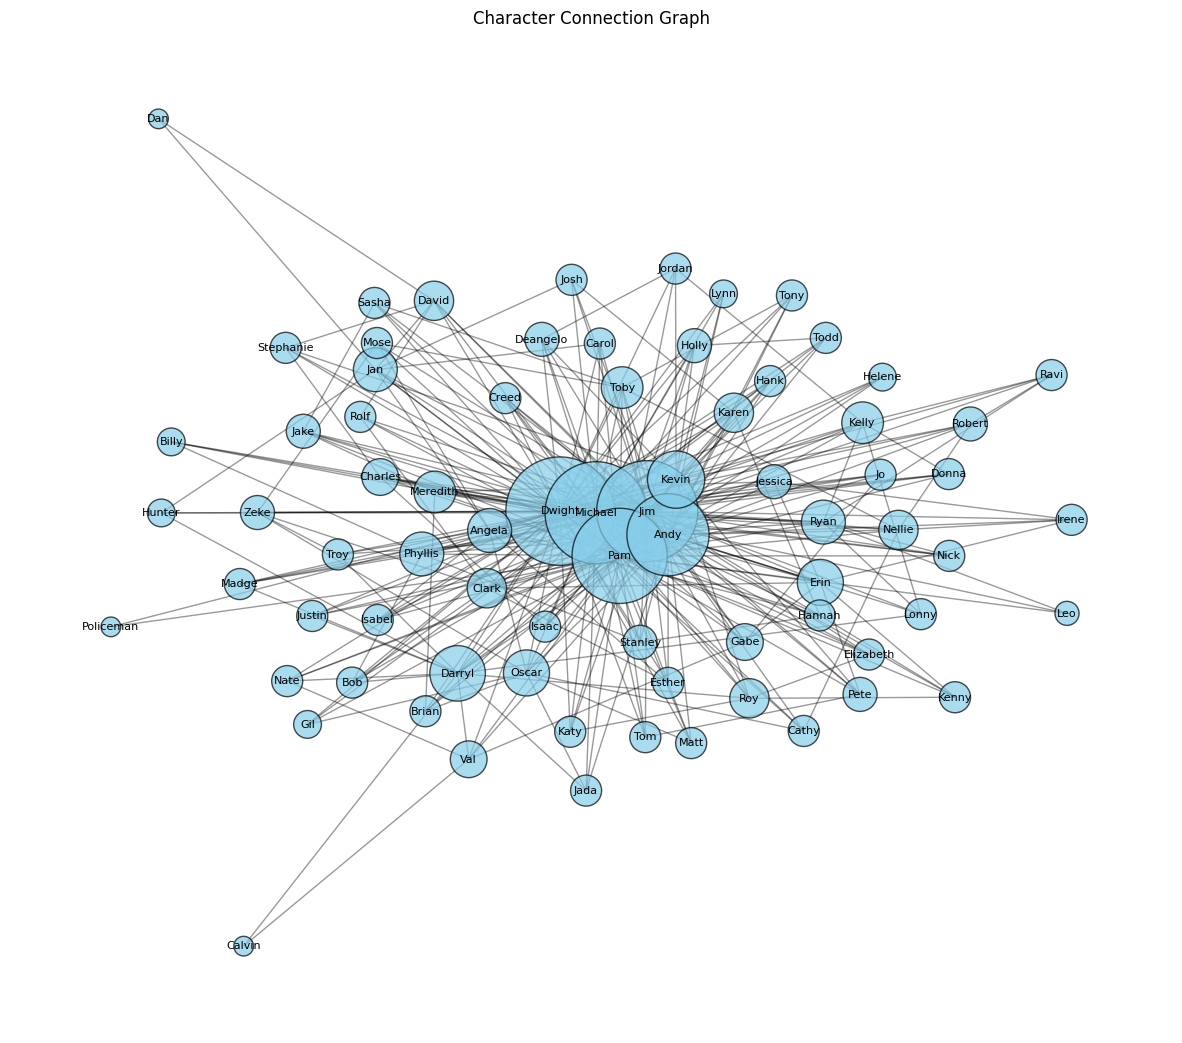

In [16]:
# Function to count connections and return only the top 5
def count_top_connections(connections_dict):
    top_connections_dict = {}
    for name, connections in connections_dict.items():
        connection_counts = Counter(connections)
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        top_connections_dict[name] = [conn for conn, count in sorted_counts[:5]]
    return top_connections_dict

def draw_graph(top_connections_dict):
    G = nx.Graph()

    # Add nodes and edges to the graph
    for name, connections in top_connections_dict.items():
        G.add_node(name)
        for conn in connections:
            if conn != 'The':  # Skip 'The'
                G.add_edge(name, conn)
    
    # Calculate node sizes: Use a scaling factor to control the node size increment
    scale_factor = 100  # Adjust the scale factor as needed
    node_sizes = {node: G.degree(node) * scale_factor for node in G.nodes()}

    # Choose a layout that spreads nodes using the Fruchterman-Reingold force-directed algorithm
    pos = nx.spring_layout(G, k=0.3, iterations=50)

    plt.figure(figsize=(15, 13))
    # Draw nodes with alpha transparency
    nx.draw_networkx_nodes(G, pos, node_size=[node_sizes[n] for n in G.nodes()],
                           node_color='skyblue', linewidths=1, edgecolors='black', alpha=0.7)
    # Draw edges with alpha transparency
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_labels(G, pos, font_size=8, horizontalalignment='center', verticalalignment='center')
    plt.title("Character Connection Graph")
    plt.axis('off')
    plt.show()

# Get the top 5 connections for each character
top_connections_dict = count_top_connections(connections_dict)
# Draw the graph with variable node sizes
draw_graph(top_connections_dict)